#  A written description of three observable trends based on the data.

1. In the Latitude vs Temperature plot,it can be seen that temperation and latitude have a positive clockwise relationship. That is, temperature becomes warmer towards South. Though, latitude at point -20 has a positive relationship with temperature but at a diminishing rate until at point 0 where inverse relationship began. This means, the increase in temperature becomes slower towards South when latitude was bewteen point -20 and 0, and the temperature continue to be cool, cold and colder. This could be due to conditions of the atmosphere of the cities randomly selected at the time of the data collection.

2. In the Latitude vs Humidity plot, latitude axis at point 40 shows that the scatter plots concentrated more when the humidity axis was at point 80 and above. Therefore, it can be said that there exists a positive relationship between humidity and latitude. That is, as latitude tends towards the South from the North, the temperature becomes warmer and invariably increases the water vapor in the atmosphere. The term humidity generally refers to the amount of water vapor in the atmosphere.See https://www.scientificamerican.com/article/what-causes-humidity/, warm air can hold more water than cool air. 


3. In the Latitude vs Cloudiness plot, there appears no observable relationship in this study.

# WeatherPy


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key= 'f9b3de9264d1831a780da2e78d455112'
units='metric'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace the encoded city space in URL
    city = city.replace(" ", "%20")
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# identiful URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# URL Query
query_url = f"{url}&APPID={api_key}&units={units}&q="

# Lists to hold reponse info
city_name =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp =[]
wind_speed =[]

# API record Calls 
record = 0
set = 1
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
   
    try: 
        response = requests.get(query_url+city).json()
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        if record >= 49:
            record = 0
            set = set+1
            city_name.append(response["name"])
        else:
            record = record + 1
            city_name.append(response["name"])
        
        
        
        
        print(f"Processing Record {record} of set {set}| {city}")
       
        
        
        
        # Wait for two seconds in loop
        time.sleep(2)
        
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1| yellowknife
Processing Record 2 of set 1| mataura
Processing Record 3 of set 1| daru
Processing Record 4 of set 1| carnarvon
Processing Record 5 of set 1| busembatia
Processing Record 6 of set 1| atuona
Processing Record 7 of set 1| abnub
Processing Record 8 of set 1| busselton
Processing Record 9 of set 1| hithadhoo
City not found. Skipping...
Processing Record 10 of set 1| ushuaia
Processing Record 11 of set 1| tongliao
Processing Record 12 of set 1| vaini
Processing Record 13 of set 1| umea
Processing Record 14 of set 1| talnakh
Processing Record 15 of set 1| castro
Processing Record 16 of set 1| la%20asuncion
Processing Record 17 of set 1| fairbanks
Processing Record 18 of set 1| bambous%20virieux
Processing Record 19 of set 1| rikitea
Processing Record 20 of set 1| tanout
Processing Record 21 of set 1| norman%20wells
Processing Record 22 of set 1| kalga
Processing Record 23 of set 1| pedernales


Processing Record 32 of set 4| lorengau
Processing Record 33 of set 4| hualmay
Processing Record 34 of set 4| muros
Processing Record 35 of set 4| half%20moon%20bay
City not found. Skipping...
Processing Record 36 of set 4| kavieng
Processing Record 37 of set 4| kaitangata
Processing Record 38 of set 4| hofn
Processing Record 39 of set 4| nizhneangarsk
Processing Record 40 of set 4| belyy%20yar
Processing Record 41 of set 4| kamenka
Processing Record 42 of set 4| cabo%20san%20lucas
Processing Record 43 of set 4| isla%20vista
Processing Record 44 of set 4| mattru
Processing Record 45 of set 4| ribeira%20grande
Processing Record 46 of set 4| kutum
Processing Record 47 of set 4| lekoni
Processing Record 48 of set 4| ancud
Processing Record 49 of set 4| sitka
Processing Record 0 of set 5| jamestown
Processing Record 1 of set 5| chokurdakh
Processing Record 2 of set 5| sri%20aman
Processing Record 3 of set 5| port%20blair
Processing Record 4 of set 5| lethem
Processing Record 5 of set 5| ka

City not found. Skipping...
Processing Record 22 of set 8| manaure
Processing Record 23 of set 8| tiarei
Processing Record 24 of set 8| antalaha
City not found. Skipping...
Processing Record 25 of set 8| camacha
Processing Record 26 of set 8| soyo
Processing Record 27 of set 8| la%20ronge
Processing Record 28 of set 8| raduzhnyy
Processing Record 29 of set 8| salalah
Processing Record 30 of set 8| boyolangu
City not found. Skipping...
Processing Record 31 of set 8| kohima
Processing Record 32 of set 8| gainesville
Processing Record 33 of set 8| tawang
Processing Record 34 of set 8| iglesias
City not found. Skipping...
Processing Record 35 of set 8| port%20augusta
Processing Record 36 of set 8| nampula
Processing Record 37 of set 8| formosa
Processing Record 38 of set 8| gunupur
Processing Record 39 of set 8| bielsk%20podlaski
Processing Record 40 of set 8| arona
Processing Record 41 of set 8| marrakesh
Processing Record 42 of set 8| vysokogornyy
Processing Record 43 of set 8| vesoul
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Bellow is dictionary for establishing DataFrame
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}



In [7]:
# Bellow is the Created DataFrame from the above dictionary
output_data = pd.DataFrame(weather_dict)
# Display dataframe
output_data.head(603)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,90,CA,1575389467,84,62.45,-114.38,-13.00,3.10
1,Mataura,0,NZ,1575389675,76,-46.19,168.86,9.44,3.58
2,Daru,100,PG,1575389677,91,-9.07,143.21,25.00,1.54
3,Carnarvon,15,ZA,1575389679,13,-30.97,22.13,23.90,11.16
4,Busembatia,100,UG,1575389682,86,0.77,33.62,23.08,1.51
...,...,...,...,...,...,...,...,...,...
540,Banda Aceh,96,ID,1575390700,89,5.56,95.32,23.67,1.19
541,Minas Novas,99,BR,1575390926,88,-17.22,-42.59,22.27,2.28
542,Toora-Khem,25,RU,1575390928,97,52.47,96.11,-18.80,0.73
543,Cabedelo,75,BR,1575390930,62,-6.97,-34.84,30.00,5.10


In [8]:
# Save data frame to CSV

output_data.to_csv("output_data/cities.csv", encoding="utf8")


In [9]:
# Display count of weather data values 
output_data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [10]:
# Display data frame head 
output_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,90,CA,1575389467,84,62.45,-114.38,-13.00,3.10
1,Mataura,0,NZ,1575389675,76,-46.19,168.86,9.44,3.58
2,Daru,100,PG,1575389677,91,-9.07,143.21,25.00,1.54
3,Carnarvon,15,ZA,1575389679,13,-30.97,22.13,23.90,11.16
4,Busembatia,100,UG,1575389682,86,0.77,33.62,23.08,1.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

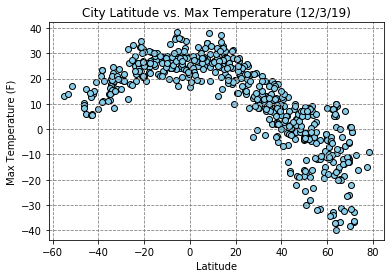

In [49]:
# A scatter plot FOR Latitude vs. Temperature PloT
plt.scatter(output_data["Lat"],output_data["Max Temp"],edgecolors="black",facecolors="skyblue")
# The graph properties
plt.title("City Latitude vs. Max Temperature (12/3/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="--",color="grey")
plt.savefig("CitylatitudevsmaxTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

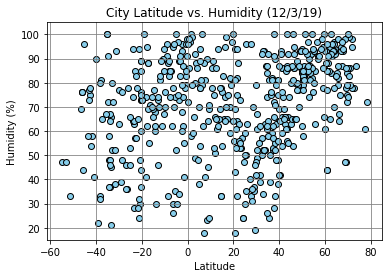

In [50]:
# A scatter plot
plt.scatter(output_data["Lat"],output_data["Humidity"],edgecolors="black",facecolors="skyblue")
#The graph properties
plt.title("City Latitude vs. Humidity (12/3/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("CitylatitudevsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

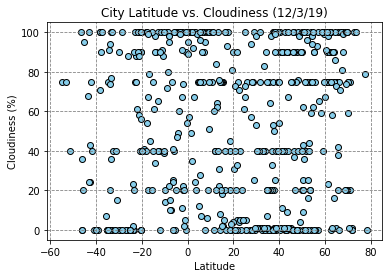

In [51]:
# A scatter plot
plt.scatter(output_data["Lat"],output_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
#The graph properties
plt.title("City Latitude vs. Cloudiness (12/3/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="--",color="grey")
plt.savefig("CitylatitudevsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

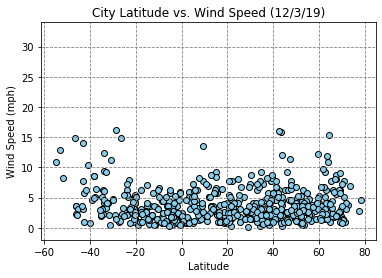

In [52]:

# A scatter plot
plt.scatter(output_data["Lat"],output_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
# The graph properties
plt.title("City Latitude vs. Wind Speed (12/3/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="--",color="grey")
plt.savefig("CitylatitudevsWindSpeed.png")
plt.show()

